# Figure 4: Boxplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

import smpsite as smp

%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/envs/notebook/share/proj failed


In [2]:
df = pd.read_csv("../../outputs/fig4_5000sim_total.csv")
df

,Unnamed: 0,plong,plat,total_samples,samples_per_sites,S2_vgp,error_angle,S2_vgp_real,n_tot,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,hash
0,0,231.233958,89.078084,100.0,2,258.092561,0.921916,191.7229,100,50,2,50,30.0,0.0,0.0,G,NaN,True,-8335591600388957984
1,1,63.804499,89.231872,100.0,2,181.571799,0.768128,191.7229,100,50,2,50,30.0,0.0,0.0,G,NaN,True,-8335591600388957984
2,2,291.665245,87.059161,100.0,2,179.071413,2.940839,191.7229,100,50,2,50,30.0,0.0,0.0,G,NaN,True,-8335591600388957984
3,3,330.248972,87.105972,100.0,2,163.079929,2.894028,191.7229,100,50,2,50,30.0,0.0,0.0,G,NaN,True,-8335591600388957984
4,4,38.224125,87.075199,100.0,2,218.421320,2.924801,191.7229,100,50,2,50,30.0,0.0,0.0,G,NaN,True,-8335591600388957984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524995,4995,148.732544,84.169662,96.0,6,-155.962415,5.830338,191.7229,102,17,6,50,30.0,0.0,0.4,G,NaN,vandamme,2995613283241899664
524996,4996,57.944083,88.316125,84.0,6,-296.623262,1.683875,191.7229,102,17,6,50,30.0,0.0,0.4,G,NaN,vandamme,2995613283241899664
524997,4997,332.897508,82.935519,96.0,6,205.145417,7.064481,191.7229,102,17,6,50,30.0,0.0,0.4,G,NaN,vandamme,2995613283241899664
524998,4998,289.433482,82.479833,96.0,6,-27.928311,7.520167,191.7229,102,17,6,50,30.0,0.0,0.4,G,NaN,vandamme,2995613283241899664


/tmp/ipykernel_3098/4131771631.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["Sampling Strategy"] = df_.apply(lambda row : rename_outlier_method(row.ignore_outliers), axis=1)


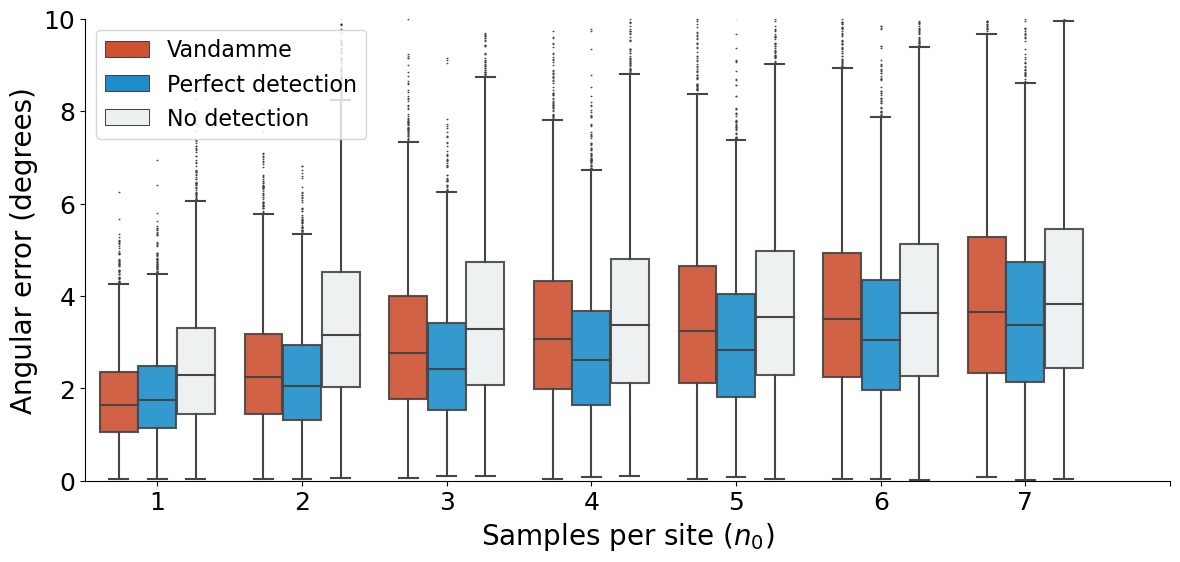

In [3]:
fig, ax = plt.subplots(figsize=(14,6))

outlier_rate = .10

df_ = df[df.outlier_rate == outlier_rate]

def rename_outlier_method(x):
    if x == "vandamme": 
        return "Vandamme"
    elif x == "False":
        return "No detection"
    elif x == "True":
        return "Perfect detection"
    else: 
        raise ValueError()

df_["Sampling Strategy"] = df_.apply(lambda row : rename_outlier_method(row.ignore_outliers), axis=1) 
        
my_pal = {"Vandamme": "#e84118", 
          "No detection": "#ecf0f1",
          "Perfect detection": "#0097e6"}

hue_order = ["Vandamme", "Perfect detection", "No detection"]

# create grouped boxplot 
sns.boxplot(data = df_,
            x = 'samples_per_sites',
            y = 'error_angle',
            hue = 'Sampling Strategy',
            hue_order = hue_order, 
            palette=my_pal,
            fliersize=0.4, 
            boxprops=dict(alpha=.9),
            width=0.8, 
            #orient = "h",
            ax=ax)

plt.legend(loc='upper left', fontsize=16)
ax.set_ylim(0,10)

plt.xlabel("Samples per site ($n_0$)", fontsize=20)
plt.ylabel("Angular error (degrees)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks([0,1,2,3,4,5,6,7], fontsize=18)

ax.spines[['right', 'top']].set_visible(False)

#plt.savefig("Figure4_{}.pdf".format(outlier_rate), format="pdf", bbox_inches='tight')
#plt.savefig("Figure4_{}.png".format(outlier_rate), format="png", bbox_inches='tight')

## VGP scatter

/tmp/ipykernel_3098/2634743452.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["Sampling Strategy"] = df_.apply(lambda row : rename_outlier_method(row.ignore_outliers), axis=1)


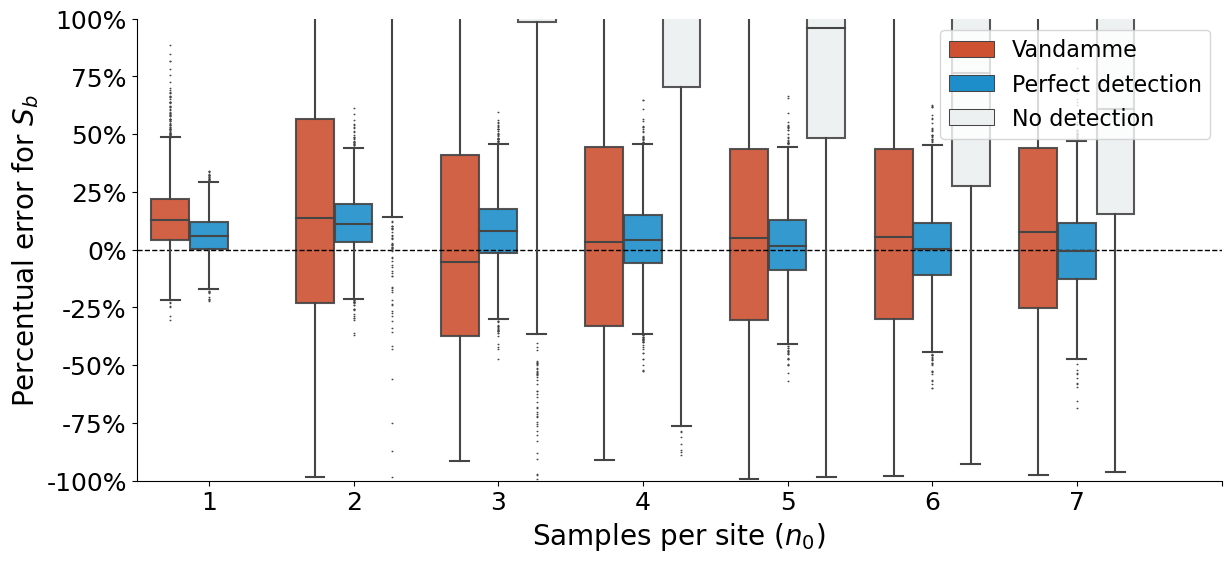

In [4]:
fig, ax = plt.subplots(figsize=(14,6))

df["error_S_vgp"] = (df.S2_vgp ** .5 - df.S2_vgp_real ** .5) / df.S2_vgp_real ** .5 * 100

outlier_rate = .4

df_ = df[df.outlier_rate == outlier_rate]

def rename_outlier_method(x):
    if x == "vandamme": 
        return "Vandamme"
    elif x == "False":
        return "No detection"
    elif x == "True":
        return "Perfect detection"
    else: 
        raise ValueError()

df_["Sampling Strategy"] = df_.apply(lambda row : rename_outlier_method(row.ignore_outliers), axis=1) 
        
my_pal = {"Vandamme": "#e84118", 
          "No detection": "#ecf0f1",
          "Perfect detection": "#0097e6"}

hue_order = ["Vandamme", "Perfect detection", "No detection"]

plt.axhline(y=0, color = 'black', ls="--", lw=1)

# create grouped boxplot 
sns.boxplot(data = df_,
            x = 'samples_per_sites',
            y = 'error_S_vgp',
            hue = 'Sampling Strategy',
            hue_order = hue_order, 
            palette=my_pal,
            fliersize=0.4, 
            boxprops=dict(alpha=.9),
            width=0.8, 
            #orient = "h",
            ax=ax)

plt.legend(loc='upper right', fontsize=16)
ax.set_ylim(-1,1)

plt.xlabel("Samples per site ($n_0$)", fontsize=20)
plt.ylabel("Percentual error for $S_b$", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks([0,1,2,3,4,5,6,7], fontsize=18)
plt.yticks([-100, -75, -50, -25, 0, 25, 50, 75, 100], [ "-100%", "-75%", "-50%","-25%","0%","25%","50%","75%", "100%"])


ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure5_{}.pdf".format(outlier_rate), format="pdf", bbox_inches='tight')
plt.savefig("Figure5_{}.png".format(outlier_rate), format="png", bbox_inches='tight')